In [1]:
from gw_signal_tools.waveform_utils import (
    td_to_fd_waveform, fd_to_td_waveform,
    pad_to_get_target_df, restrict_f_range,
    get_strain
)

from gw_signal_tools.inner_product import (
    inner_product, norm, overlap
)

from gw_signal_tools.PSDs import psd_gw150914

import astropy.units as u
import lalsimulation.gwsignal.core.waveform as wfm
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', '.*This code is currently UNREVIEWED, use with caution!.*')

/home/user/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


In [2]:
from gw_signal_tools import PLOT_STYLE_SHEET
plt.style.use(PLOT_STYLE_SHEET)

In [3]:
# Define the dictionary
f_min = 20.*u.Hz

parameters_gw150914 = {
    # 'mass1' : 36*u.solMass,
    # 'mass2' : 29*u.solMass,
    'chirp_mass': 36*u.Msun,
    'mass_ratio': 0.5*u.dimensionless_unscaled,
    'deltaT' : 1./2048.*u.s,
    'f22_start' : f_min,  # Lower cutoff frequency
    'f22_ref': 20.*u.Hz,# Frequency where spins are specified
    'phi_ref' : 0.*u.rad,
    'distance' : 1.*u.Mpc,
    'inclination' : 0.0*u.rad,
    'eccentricity' : 0.*u.dimensionless_unscaled,
    'longAscNodes' : 0.*u.rad,
    'meanPerAno' : 0.*u.rad,
    'condition' : 0
}

# Define the approximant
approximant = 'IMRPhenomXPHM'

# Call the generator
gen = wfm.LALCompactBinaryCoalescenceGenerator(approximant)


# Generate time domain waveform
hp_t, hc_t = wfm.GenerateTDWaveform(parameters_gw150914, gen)


# Two waveforms will be generated in frequency domain, first with finer
# sampling and then with coarser one
hp_f_fine, hc_f_fine = wfm.GenerateFDWaveform(parameters_gw150914, gen)
hp_f_fine.override_unit(u.s)
hc_f_fine.override_unit(u.s)

hp_f_coarse, hc_f_coarse = wfm.GenerateFDWaveform(parameters_gw150914 | {'deltaF': 1.0 / (hp_t.size * hp_t.dx)}, gen)
hp_f_coarse.override_unit(u.s)
hc_f_coarse.override_unit(u.s)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is

In [4]:
import gw_signal_tools

gw_signal_tools.disable_caching()

# import gw_signal_tools

2024-08-08  14:11:54  INFO (caching.py: 19): Disabling caching


In [5]:
import astropy.units as u
from gw_signal_tools.types import HashableDict

parameters_gw150914 = {
    # 'mass1' : 36*u.solMass,
    # 'mass2' : 29*u.solMass,
    'chirp_mass': 36*u.Msun,
    'mass_ratio': 0.5*u.dimensionless_unscaled,
    'deltaT' : 1./2048.*u.s,
    'f22_start' : 20.*u.Hz,  # Lower cutoff frequency
    'f22_ref': 20.*u.Hz,# Frequency where spins are specified
    'phi_ref' : 0.*u.rad,
    'distance' : 1.*u.Mpc,
    'inclination' : 0.0*u.rad,
    'eccentricity' : 0.*u.dimensionless_unscaled,
    'longAscNodes' : 0.*u.rad,
    'meanPerAno' : 0.*u.rad,
    'condition' : 1
}

# parameters_gw150914 = HashableDict(parameters_gw150914)

In [6]:
from gw_signal_tools.waveform_utils import get_wf_generator

phenomx_gen = get_wf_generator('IMRPhenomXPHM')
seob4_gen = get_wf_generator('SEOBNRv4PHM')

phenomx_gen(parameters_gw150914)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is

<FrequencySeries([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j,
                  0.+0.j]
                 unit=Unit("s"),
                 f0=<Quantity 0. Hz>,
                 df=<Quantity 0.0625 Hz>,
                 epoch=<Time object: scale='utc' format='gps' value=0.0>,
                 name='hplus',
                 channel=None)>

In [7]:
from gw_signal_tools.inner_product import optimize_overlap

optimize_overlap(
    parameters_gw150914,
    seob4_gen,
    phenomx_gen,
    ['time', 'phase']
)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is

(<FrequencySeries([-1.53370451e-22+0.00000000e+00j,
                   -1.51355602e-22-2.66128979e-23j,
                   -1.45289995e-22-5.28218447e-23j, ...,
                    2.94513859e-26-3.79808277e-27j,
                    2.96365569e-26-1.90310997e-27j,
                    2.96983714e-26+0.00000000e+00j]
                  unit=Unit("s"),
                  f0=<Quantity 0. Hz>,
                  df=<Quantity 0.0625 Hz>,
                  epoch=<Time object: scale='utc' format='gps' value=0.0>,
                  name='hplus',
                  channel=None)>,
 <FrequencySeries([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.-0.j, 0.+0.j,
                   0.+0.j]
                  unit=Unit("s"),
                  f0=<Quantity 0. Hz>,
                  df=<Quantity 0.0625 Hz>,
                  epoch=<Time object: scale='utc' format='gps' value=0.0>,
                  name='hplus',
                  channel=None)>,
 {'time': <Quantity -0.07128906 s>, 'phase': <Quantity -1.54038179 rad>})

# Performance Tests

FrequencySeries([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j,
                 0.+0.j]
                unit: s,
                f0: 0.0 Hz,
                df: 0.0625 Hz,
                epoch: 0.0,
                name: hplus,
                channel: None)


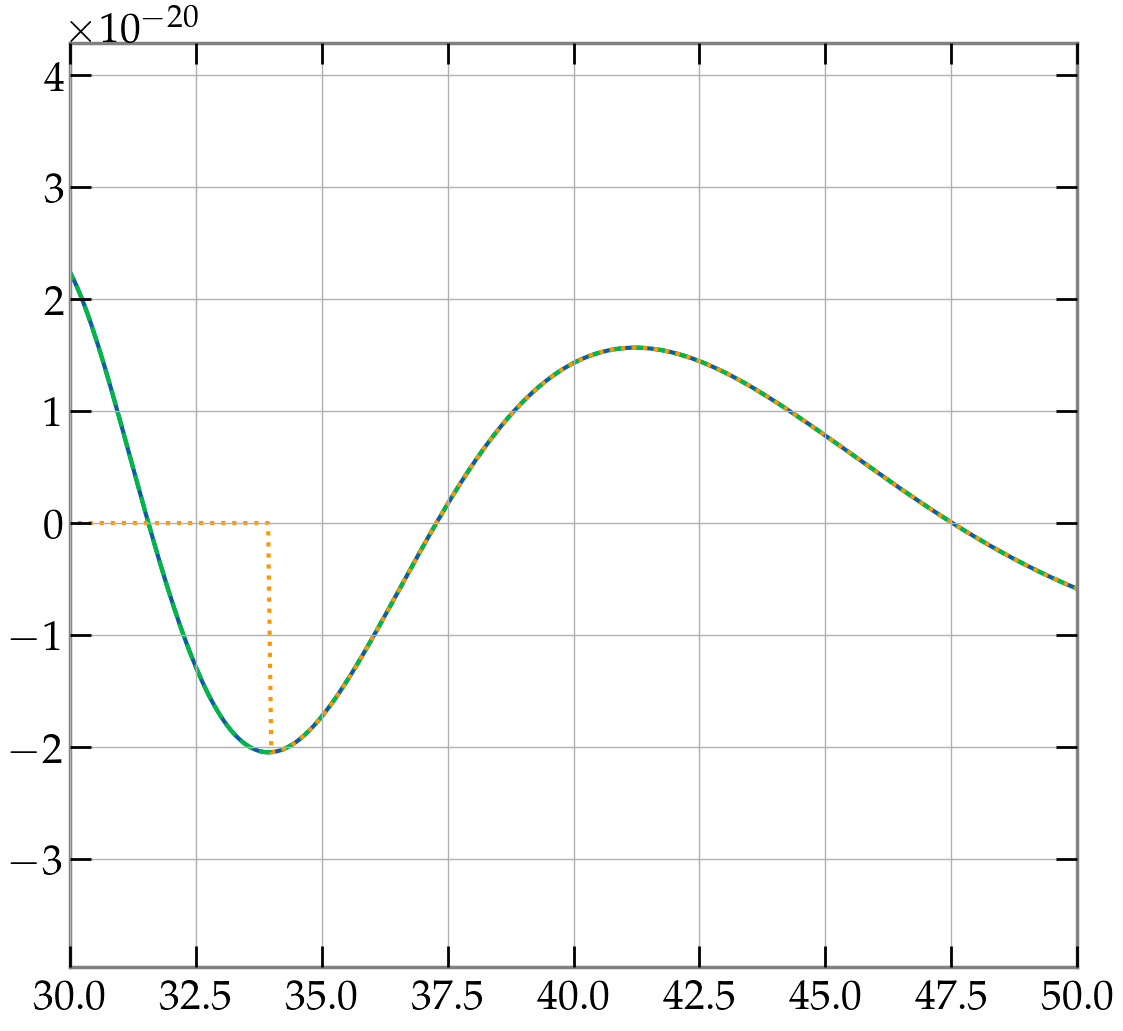

In [8]:
plt.plot(hp_f_fine.real)

hp_f_fine_resctricted = restrict_f_range(
    hp_f_fine,
    # f_range=[32.0, 1022],
    # f_range=[-32.0, 1048],
    f_range=[None, 1048],  # hp_f_fine should be edited here -> nope, error (consistent with previous behaviour)
    fill_range=[34, 1020],
    copy=False
    #  copy=True
)


print(hp_f_fine_resctricted)

plt.plot(hp_f_fine.real, '--')
plt.plot(hp_f_fine_resctricted.real, ':')

plt.xlim([30, 50])
# plt.xlim([-30, 50])
# plt.xlim([1000, 1100])

plt.show()

### Testing restrict_f_range speed

In [9]:
%%timeit -n 10 -r 10

f_lower_crop = 42.0 * u.Hz

hp_f_fine, _ = wfm.GenerateFDWaveform(parameters_gw150914, gen)
# hp_f_fine.crop(start=f_lower_crop)
df = hp_f_fine.df

number_to_fill = int(f_lower_crop / df)
hp_f_fine[:number_to_fill] = np.zeros(number_to_fill)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is

222 ms ± 1.58 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is

In [10]:
%%timeit -n 10 -r 10

f_lower_crop = 42.0 * u.Hz

hp_f_fine, _ = wfm.GenerateFDWaveform(parameters_gw150914, gen)
# hp_f_fine.crop(start=f_lower_crop)

hp_f_fine = restrict_f_range(hp_f_fine, f_range=[f_lower_crop, None], copy=True)
# hp_f_fine = restrict_f_range(hp_f_fine, f_range=[f_lower_crop, None], copy=False)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is

224 ms ± 2.92 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is

copy=True: around 190 with .fill, around 190 with newer one (ones and multiply with fill_val)

copy=False: around 180 with .fill, around 180 with newer one (ones and multiply with fill_val)

Now verifying that no inplace editing takes place

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is

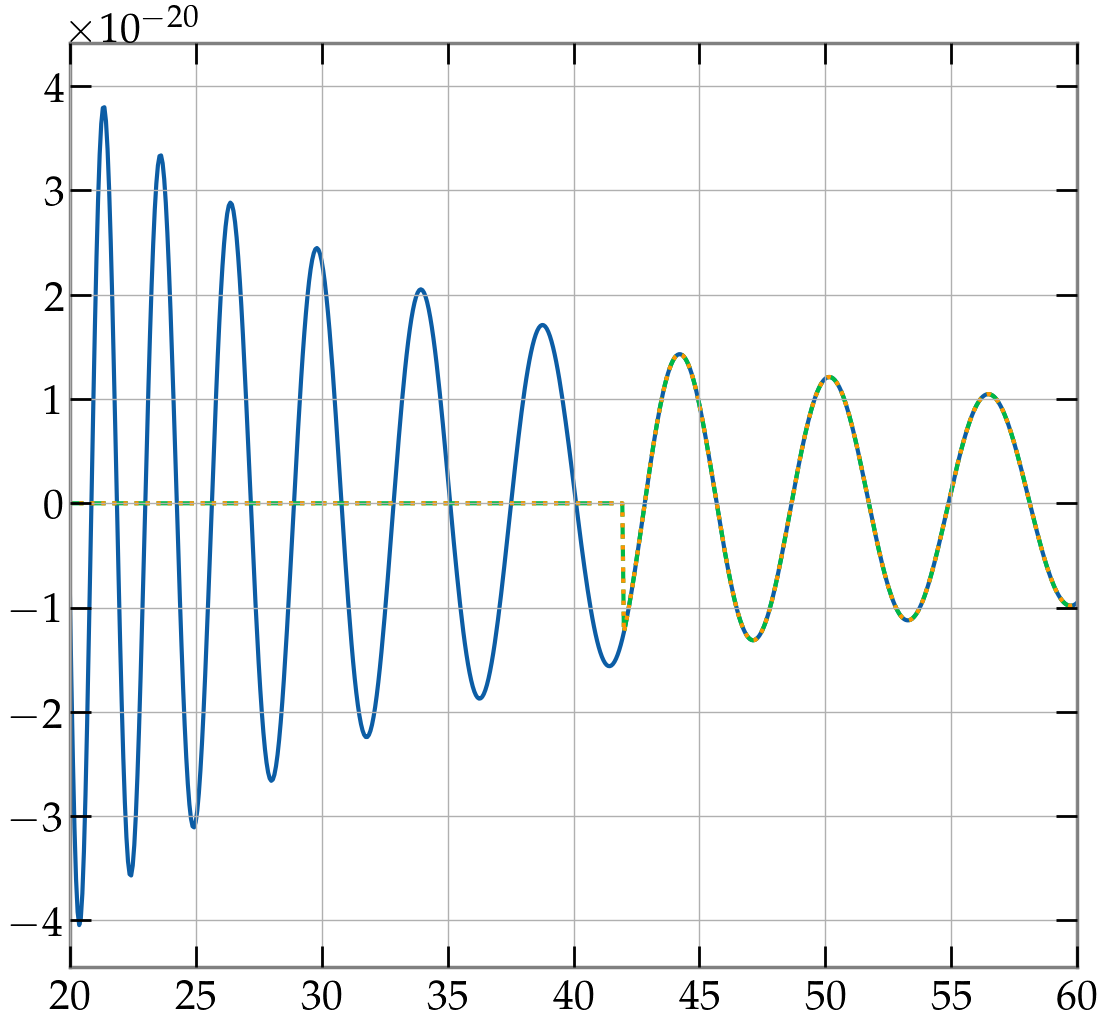

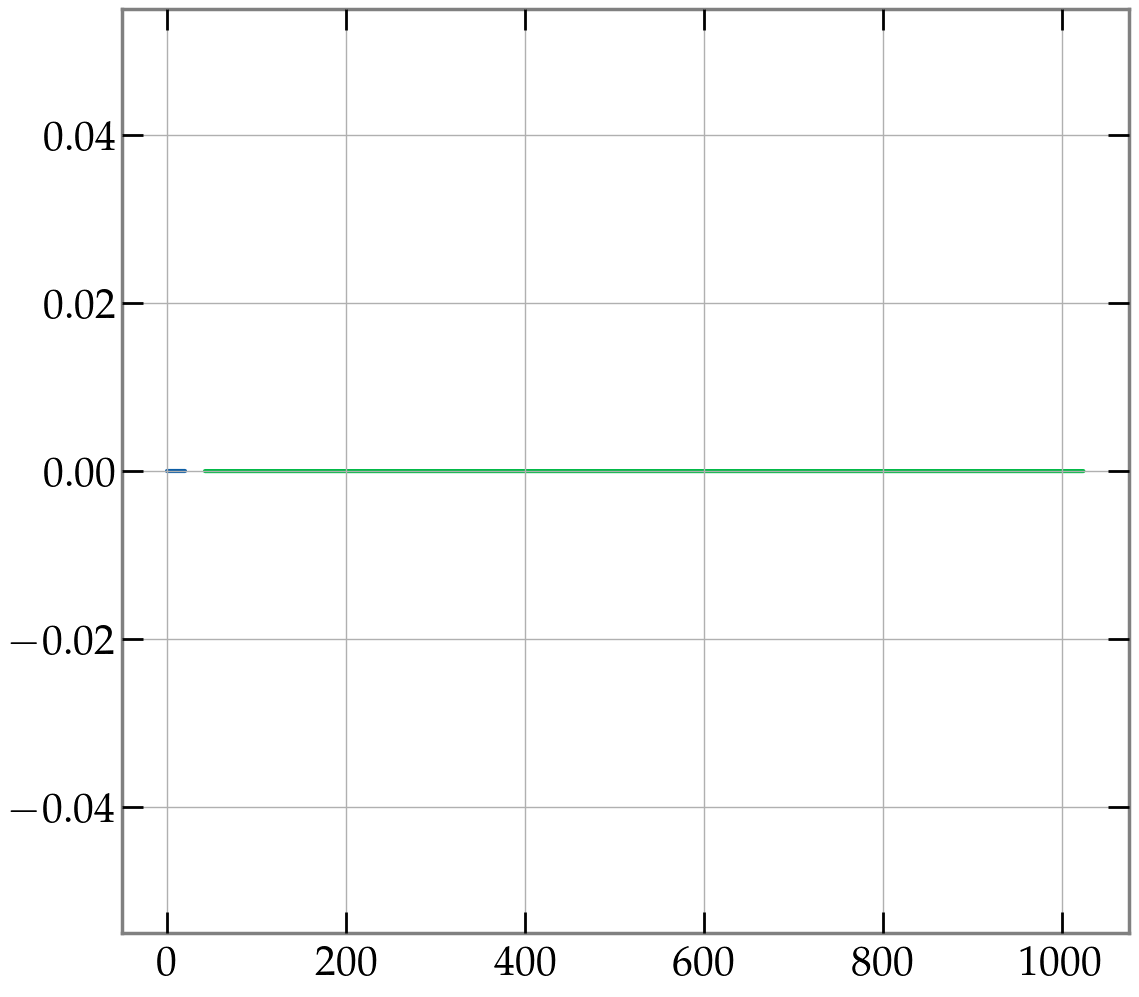

In [11]:
f_lower_crop = 42.0 * u.Hz

hp_f_fine, _ = wfm.GenerateFDWaveform(parameters_gw150914, gen)


plt.plot(hp_f_fine)

hp_f_fine_2 = restrict_f_range(hp_f_fine, fill_range=[f_lower_crop, None], copy=True)
# hp_f_fine_2 = restrict_f_range(hp_f_fine, fill_range=[f_lower_crop, None], copy=False)


plt.plot(hp_f_fine, '--')

plt.plot(hp_f_fine_2, ':')


plt.xlim([20, 60])

plt.show()


plt.plot((hp_f_fine - hp_f_fine_2).crop(end=f_min))
# In between, we make second one zero, but first one is not zero.
# Thus excluded in this plot, we want to see if everything is zero
plt.plot((hp_f_fine - hp_f_fine_2).crop(start=f_lower_crop))

plt.show()

Testing if pad_to_f_zero works as intended, i.e. if it copies

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is

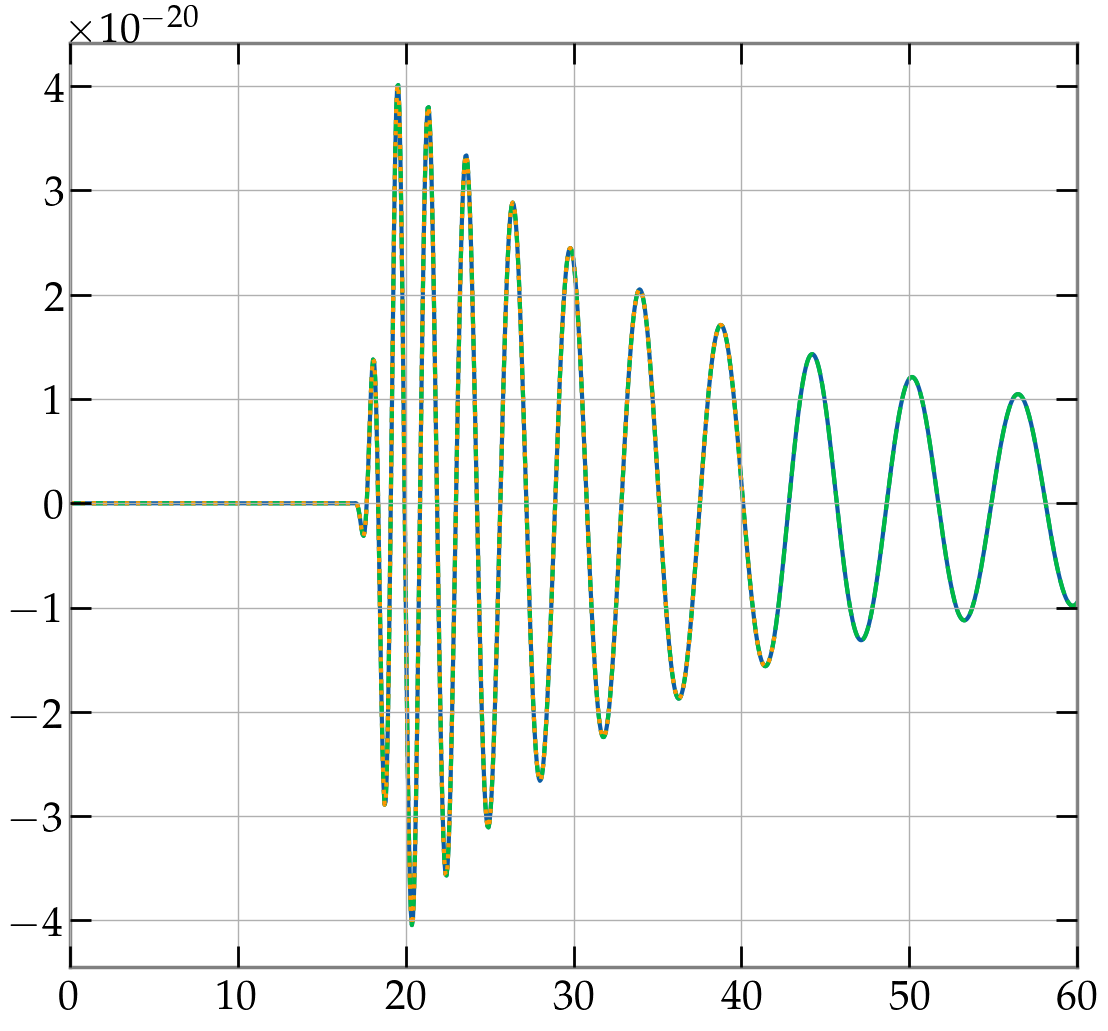

In [12]:
f_upper_crop = 42.0 * u.Hz

hp_f_fine, _ = wfm.GenerateFDWaveform(parameters_gw150914, gen)


plt.plot(hp_f_fine)


hp_f_fine_2 = restrict_f_range(hp_f_fine, f_range=[0.0, f_upper_crop], copy=False)


plt.plot(hp_f_fine, '--')
plt.plot(hp_f_fine_2, ':')


plt.xlim([0, 60])

plt.show()

## Inner Product

In [13]:
from pycbc.waveform import get_td_waveform, get_fd_waveform
from pycbc.filter import match
from pycbc.psd import aLIGOZeroDetHighPower

from gwpy.timeseries.timeseries import TimeSeries
from gwpy.frequencyseries.frequencyseries import FrequencySeries

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [14]:
f_low, f_high = 20, 350

sample_rate = 4096


# Enter some arbitrary parameters here
signals_to_compare = {
    'signal1': {
        'mass1': 10,
        'mass2': 10,
        'spin1': 0.6,
        'spin2': 0.0
    },
    'signal2':{
        'mass1': 96,
        'mass2': 20,
        'spin1': 0.0,
        'spin2': 0.1
    }
}


hp_1_pycbc, _ = get_fd_waveform(
    approximant=approximant,
    **signals_to_compare['signal1'],
    f_lower=f_low,
    f_upper=f_high,
    delta_f=1.0/sample_rate
)

hp_2_pycbc, _ = get_fd_waveform(
    approximant=approximant,
    **signals_to_compare['signal2'],
    f_lower=f_low,
    f_upper=f_high,
    delta_f=1.0/sample_rate
)

tlen = max(len(hp_1_pycbc), len(hp_2_pycbc))
hp_1_pycbc.resize(tlen)
hp_2_pycbc.resize(tlen)

delta_f = 1.0 / hp_2_pycbc.duration
flen = tlen//2 + 1
psd_pycbc = aLIGOZeroDetHighPower(flen, delta_f, f_low)


hp_1_pycbc_converted = FrequencySeries.from_pycbc(hp_1_pycbc) * u.s
hp_2_pycbc_converted = FrequencySeries.from_pycbc(hp_2_pycbc) * u.s
psd_pycbc_converted = FrequencySeries.from_pycbc(psd_pycbc) / u.Hz

Testing which method is most efficient

In [15]:
# Set test parameters
df_test = None
# df_test = 2**-6*u.Hz
f_range_test = None
# f_range_test = [20, 960]
optimize = True
# optimize = False

In [16]:
_ = match(hp_1_pycbc, hp_2_pycbc, psd=psd_pycbc, low_frequency_cutoff=f_low, high_frequency_cutoff=f_high)  # Initialize match function (not sure if it works)

%timeit match(hp_1_pycbc, hp_2_pycbc, psd=psd_pycbc, low_frequency_cutoff=f_low, high_frequency_cutoff=f_high)

2.1 s ± 8.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Hm, this can't be right. There is probably some initilization going on for each call

In [17]:
%timeit -n 100 -r 10 norm(hp_t, psd_gw150914, df=df_test, f_range=f_range_test, optimize_time_and_phase=optimize)

69 ms ± 1.76 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [18]:
%timeit -n 100 -r 10 norm(hp_t, psd_gw150914, df=0.125, f_range=f_range_test, optimize_time_and_phase=optimize)

61.5 ms ± 4.86 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


This time is much larger than before... Perhaps due to setting epoch in td_to_fd_waveform

In [19]:
%timeit -n 100 -r 10 norm(hp_f_fine, psd_gw150914, df=df_test, f_range=f_range_test, optimize_time_and_phase=optimize)

6.83 ms ± 347 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [20]:
%timeit -n 100 -r 10 norm(hp_f_coarse, psd_gw150914, df=df_test, f_range=f_range_test, optimize_time_and_phase=optimize)

6.53 ms ± 229 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


Clearly, choice of df makes bigger difference for time domain waveform, as opposed to frequency domain one. -> I think this changed; for df=None there is no need for resampling, which is because of correct input df

However, one should remember that generating with finer resolution also takes more time. So let us now see which method is fastest overall

In [21]:
print(gen.metadata['implemented_domain'], gen.metadata['generation_domain'])

freq freq


Thus, in theory, frequency domain should be much faster (since model is implemented there and inner product computation is also faster there)

In [22]:
%%timeit -n 10 -r 10

hp_t, _ = wfm.GenerateTDWaveform(parameters_gw150914, gen)

norm(hp_t, psd_gw150914, df=df_test, f_range=f_range_test, optimize_time_and_phase=optimize)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is

264 ms ± 6.25 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is

In [23]:
%%timeit -n 10 -r 10

hp_t, _ = wfm.GenerateTDWaveform(parameters_gw150914, gen)

norm(hp_t, psd_gw150914, df=0.125, f_range=f_range_test, optimize_time_and_phase=optimize)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is

259 ms ± 6.55 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is

In [24]:
%%timeit -n 10 -r 10

hp_f_fine, _ = wfm.GenerateFDWaveform(parameters_gw150914, gen)

norm(hp_f_fine, psd_gw150914, df=df_test, f_range=f_range_test, optimize_time_and_phase=optimize)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is

241 ms ± 5.09 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is

In [25]:
%%timeit -n 10 -r 10

hp_f_coarse, _ = wfm.GenerateFDWaveform(parameters_gw150914 | {'deltaF': 1.0 / (hp_t.size * hp_t.dx)}, gen)

norm(hp_f_coarse, psd_gw150914, df=df_test, f_range=f_range_test, optimize_time_and_phase=optimize)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is

217 ms ± 3.12 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


The speeds are very similar for all of them. Naturally, finer sampling takes longer compared to coarser one. Moreover, it is clear that Fourier transformations do not play a major role in performances. They do add about 20ms (two of them; once for WF generation and once in inner product), but coarser sampling removes roughly 25ms.

## Breakdown

In [26]:
import cProfile

In [27]:
cProfile.run(
    'norm(hp_t, psd_gw150914, optimize_time_and_phase=True)',
    sort=1
)

         20651 function calls (20379 primitive calls) in 0.126 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.016    0.008    0.024    0.012 array.py:319(epoch)
        2    0.008    0.004    0.008    0.004 _tconvert.py:97(to_gps)
       86    0.006    0.000    0.006    0.000 {function Quantity.__array_ufunc__ at 0x7ad2a5e099e0}
        3    0.005    0.002    0.005    0.002 {built-in method numpy.fft._pocketfft_internal.execute}
1507/1427    0.004    0.000    0.013    0.000 {built-in method builtins.getattr}
      470    0.002    0.000    0.005    0.000 quantity.py:573(__array_finalize__)
       86    0.002    0.000    0.018    0.000 quantity.py:612(__array_ufunc__)
      321    0.002    0.000    0.004    0.000 {built-in method numpy.array}
      135    0.002    0.000    0.007    0.000 quantity.py:763(_new_view)
       24    0.002    0.000    0.004    0.000 utils.py:18(day_frac)
       94    0.002    0.000  

In [28]:
cProfile.run(
    'norm(hp_f_fine, psd_gw150914, optimize_time_and_phase=True)',
    sort=1
)

         10439 function calls (10366 primitive calls) in 0.038 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       56    0.002    0.000    0.008    0.000 quantity.py:612(__array_ufunc__)
      817    0.002    0.000    0.003    0.000 {built-in method builtins.getattr}
      295    0.001    0.000    0.003    0.000 quantity.py:573(__array_finalize__)
        2    0.001    0.001    0.001    0.001 {built-in method numpy.core._multiarray_umath.interp_complex}
      176    0.001    0.000    0.003    0.000 {built-in method numpy.array}
       56    0.001    0.000    0.001    0.000 {function Quantity.__array_ufunc__ at 0x7ad2a5e099e0}
        1    0.001    0.001    0.001    0.001 {built-in method numpy.fft._pocketfft_internal.execute}
       92    0.001    0.000    0.005    0.000 quantity.py:423(__new__)
       80    0.001    0.000    0.003    0.000 quantity.py:763(_new_view)
       23    0.001    0.000    0.004    0.000 array.py

Ok, this is crazy... The EPOCH CONVERSION when calling restrict_f_range (which happened TWO (!) times) was the bottleneck that slowed us down??? And setting epoch=None for FrequencySeries is saving us???

In [29]:
cProfile.run(
    'hp_t, _ = wfm.GenerateTDWaveform(parameters_gw150914, gen)',
    sort=1
)

         3410 function calls (3391 primitive calls) in 0.180 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       19    0.069    0.004    0.069    0.004 {built-in method lal._lal.DictInsertREAL8Value}
        1    0.028    0.028    0.029    0.029 {built-in method lalsimulation._lalsimulation.SimInspiralGenerateTDWaveform}
        2    0.017    0.009    0.026    0.013 waveform.py:525(to_gwpy_Series)
        1    0.012    0.012    0.169    0.169 waveform.py:293(generate_td_waveform)
        2    0.010    0.005    0.010    0.005 {built-in method lalsimulation._lalsimulation.SimInspiralImplementedFDApproximants}
        2    0.007    0.004    0.007    0.004 core.py:75(_format_time)
        2    0.007    0.004    0.007    0.004 {built-in method lalsimulation._lalsimulation.SimInspiralImplementedTDApproximants}
        1    0.006    0.006    0.006    0.006 {built-in method lal._lal.DictInsertINT4Value}
        1    0.004    0.0

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is

In [30]:
cProfile.run(
    'hp_f_fine, _ = wfm.GenerateFDWaveform(parameters_gw150914, gen)',
    sort=1
)

         3432 function calls (3413 primitive calls) in 0.257 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       19    0.094    0.005    0.094    0.005 {built-in method lal._lal.DictInsertREAL8Value}
        1    0.061    0.061    0.062    0.062 {built-in method lalsimulation._lalsimulation.SimInspiralGenerateFDWaveform}
        2    0.017    0.009    0.025    0.013 array.py:319(epoch)
        1    0.012    0.012    0.248    0.248 waveform.py:334(generate_fd_waveform)
        2    0.012    0.006    0.012    0.006 {built-in method lalsimulation._lalsimulation.SimInspiralImplementedTDApproximants}
        2    0.008    0.004    0.008    0.004 _tconvert.py:97(to_gps)
        2    0.008    0.004    0.034    0.017 waveform.py:525(to_gwpy_Series)
        2    0.007    0.004    0.007    0.004 {built-in method lalsimulation._lalsimulation.SimInspiralImplementedFDApproximants}
        1    0.004    0.004    0.126    0.126 wavefor

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:887): This code is

Wow... Just wow... Epoch is actually part of reason why frequency domain generation is slower than time domain...